# Uçtan Büyük Veride Makine Öğrenmesi

## Spark Session ve Veri Seti

In [2]:
!pip install findspark

In [3]:
import findspark
findspark.init("C:\\spark")

In [104]:
import pyspark
import numpy as np
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

spark=SparkSession.builder \
                .master("local") \
                .appName("churn_modellemesi") \
                .config("spark.executer.memory","10gb") \
                .getOrCreate()

sc=spark.sparkContext
sc


<SparkContext master=local appName=churn_modellemesi>

In [5]:
spark_df=spark.read.csv("churn.csv",header=True,inferSchema=True,sep=",")
spark_df.cache()
spark_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Names: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Total_Purchase: double (nullable = true)
 |-- Account_Manager: integer (nullable = true)
 |-- Years: double (nullable = true)
 |-- Num_Sites: double (nullable = true)
 |-- Churn: integer (nullable = true)



In [6]:
spark_df=spark_df.toDF(*[c.lower() for c in spark_df.columns])
spark_df.show(5)

+---+----------------+----+--------------+---------------+-----+---------+-----+
|_c0|           names| age|total_purchase|account_manager|years|num_sites|churn|
+---+----------------+----+--------------+---------------+-----+---------+-----+
|  0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|  1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
|  2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|
|  3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|
|  4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|
+---+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 5 rows



In [7]:
#df.columns=map(str.lower,df.columns)

In [8]:
spark_df=spark_df.withColumnRenamed("_c0","index")
spark_df.show(2)

+-----+----------------+----+--------------+---------------+-----+---------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+
only showing top 2 rows



In [9]:
spark_df.count()

900

In [10]:
len(spark_df.columns)

8

In [11]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn']

In [12]:
spark_df.distinct().count()

900

In [13]:
spark_df.select("names").distinct().count()

899

In [14]:
spark_df.groupby("names").count().sort("count",ascending=False).show(3)

+-------------+-----+
|        names|count|
+-------------+-----+
|Jennifer Wood|    2|
| Patrick Bell|    1|
|Chelsea Marsh|    1|
+-------------+-----+
only showing top 3 rows



In [15]:
spark_df.filter(spark_df.names=="Jennifer Wood").show(3)

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|   22|Jennifer Wood|35.0|       9381.12|              1| 6.78|     11.0|    1|
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [16]:
spark_df.select("names").drop_duplicates().groupby("names").count().sort("count",ascending=False).show(3)

+----------------+-----+
|           names|count|
+----------------+-----+
|    Patrick Bell|    1|
|Patrick Robinson|    1|
|   Chelsea Marsh|    1|
+----------------+-----+
only showing top 3 rows



In [17]:
spark_df.where(spark_df.index==439).show()

+-----+-------------+----+--------------+---------------+-----+---------+-----+
|index|        names| age|total_purchase|account_manager|years|num_sites|churn|
+-----+-------------+----+--------------+---------------+-----+---------+-----+
|  439|Jennifer Wood|48.0|      11585.16|              0| 4.61|      9.0|    0|
+-----+-------------+----+--------------+---------------+-----+---------+-----+



In [18]:
jen=spark_df.where(spark_df.index==439).collect()[0]["names"]

In [19]:
type(jen)

str

In [20]:
dir(jen)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',


In [21]:
jen.upper()

'JENNIFER WOOD'

## Keşifçi Veri Analizi

In [22]:
spark_df.describe().show()

+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|summary|             index|        names|              age|   total_purchase|   account_manager|            years|         num_sites|              churn|
+-------+------------------+-------------+-----------------+-----------------+------------------+-----------------+------------------+-------------------+
|  count|               900|          900|              900|              900|               900|              900|               900|                900|
|   mean|             449.5|         null|41.81666666666667|10062.82403333334|0.4811111111111111| 5.27315555555555| 8.587777777777777|0.16666666666666666|
| stddev|259.95191863111916|         null|6.127560416916251|2408.644531858096|0.4999208935073339|1.274449013194616|1.7648355920350969| 0.3728852122772358|
|    min|                 0|   Aaron King|             22.0|          

In [23]:
spark_df.select("age","total_purchase","account_manager","years","num_sites","churn").describe().toPandas().T

,0,1,2,3,4
summary,count,mean,stddev,min,max
age,900,41.81666666666667,6.127560416916251,22.0,65.0
total_purchase,900,10062.82403333334,2408.644531858096,100.0,18026.01
account_manager,900,0.4811111111111111,0.4999208935073339,0,1
years,900,5.27315555555555,1.274449013194616,1.0,9.15
num_sites,900,8.587777777777777,1.7648355920350969,3.0,14.0
churn,900,0.16666666666666666,0.3728852122772358,0,1


In [24]:
spark_df.filter(spark_df.age>47).count()

161

In [26]:
spark_df.groupby("churn").count().show()

+-----+-----+
|churn|count|
+-----+-----+
|    1|  150|
|    0|  750|
+-----+-----+



In [36]:
spark_df.groupby("churn").agg({"total_purchase":"mean"}).show()

+-----+-------------------+
|churn|avg(total_purchase)|
+-----+-------------------+
|    1| 10192.179933333337|
|    0| 10036.952853333332|
+-----+-------------------+



In [37]:
spark_df.groupby("churn").agg({"years":"mean"}).show()

+-----+------------------+
|churn|        avg(years)|
+-----+------------------+
|    1|5.8835999999999995|
|    0|5.1510666666666625|
+-----+------------------+



In [38]:
kor_data=spark_df.drop("index","names").toPandas()

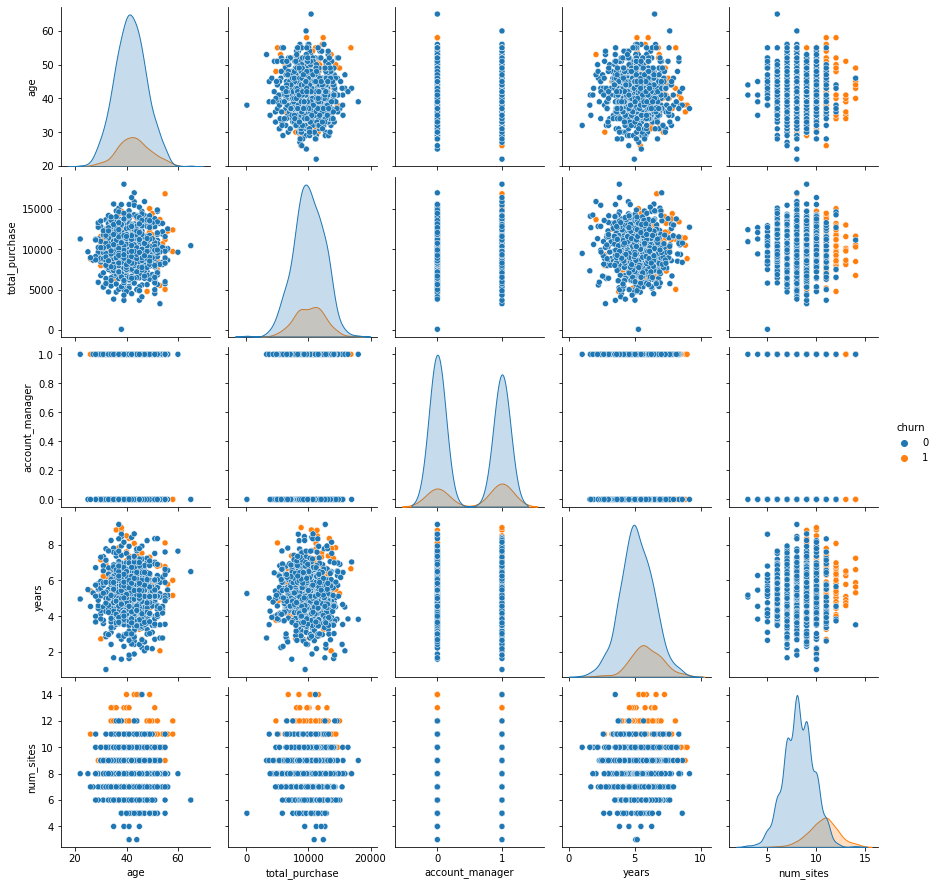

In [39]:
import seaborn as sns
sns.pairplot(kor_data,hue="churn");

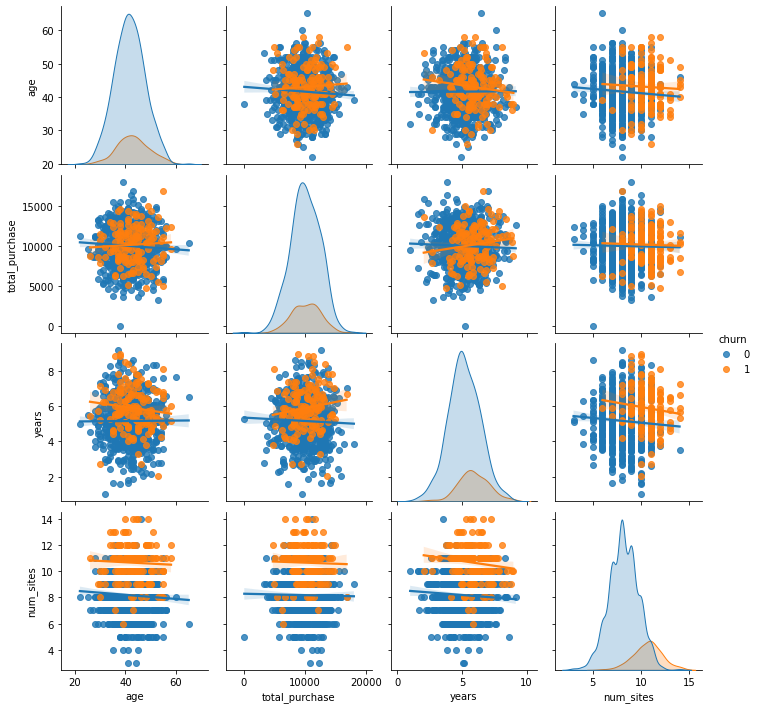

In [41]:
sns.pairplot(kor_data,vars=["age","total_purchase","years","num_sites"],hue="churn",kind="reg");

In [42]:
## Veri Önişleme

In [43]:
spark_df=spark_df.dropna()

In [44]:
spark_df=spark_df.withColumn("age_kare",spark_df.age**2)

In [46]:
spark_df.show(5)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|
|    3|   Phillip White|42.0|       8010.76|              0| 6.71|     10.0|    1|  1764.0|
|    4|  Cynthia Norton|37.0|       9191.58|              0| 5.56|      9.0|    1|  1369.0|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+
only showing top 5 rows



In [48]:
from pyspark.ml.feature import StringIndexer
stringIndexer=StringIndexer(inputCol="churn",outputCol="label")

In [49]:
?stringIndexer

Type:           StringIndexer
String form:    StringIndexer_09248b28850e
File:           c:\spark\python\pyspark\ml\feature.py
Docstring:     
A label indexer that maps a string column of labels to an ML column of label indices.
If the input column is numeric, we cast it to string and index the string values.
The indices are in [0, numLabels). By default, this is ordered by label frequencies
so the most frequent label gets index 0. The ordering behavior is controlled by
setting :py:attr:`stringOrderType`. Its default value is 'frequencyDesc'.

.. versionadded:: 1.4.0

Examples
--------
>>> stringIndexer = StringIndexer(inputCol="label", outputCol="indexed",
...     stringOrderType="frequencyDesc")
>>> stringIndexer.setHandleInvalid("error")
StringIndexer...
>>> model = stringIndexer.fit(stringIndDf)
>>> model.setHandleInvalid("error")
StringIndexerModel...
>>> td = model.transform(stringIndDf)
>>> sorted(set([(i[0], i[1]) for i in td.select(td.id, td.indexed).collect()]),
...     key=l

In [51]:
indexed=stringIndexer.fit(spark_df).transform(spark_df)

In [52]:
indexed.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'double')]

In [57]:
spark_df=indexed.withColumn("label",indexed["label"].cast("integer"))
spark_df.show(3)

+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|index|           names| age|total_purchase|account_manager|years|num_sites|churn|age_kare|label|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
|    0|Cameron Williams|42.0|       11066.8|              0| 7.22|      8.0|    1|  1764.0|    1|
|    1|   Kevin Mueller|41.0|      11916.22|              0|  6.5|     11.0|    1|  1681.0|    1|
|    2|     Eric Lozano|38.0|      12884.75|              0| 6.67|     12.0|    1|  1444.0|    1|
+-----+----------------+----+--------------+---------------+-----+---------+-----+--------+-----+
only showing top 3 rows



In [58]:
spark_df.dtypes

[('index', 'int'),
 ('names', 'string'),
 ('age', 'double'),
 ('total_purchase', 'double'),
 ('account_manager', 'int'),
 ('years', 'double'),
 ('num_sites', 'double'),
 ('churn', 'int'),
 ('age_kare', 'double'),
 ('label', 'int')]

### Bağımsız Değişkenlerin Ayarlanması

In [59]:
from pyspark.ml.feature import VectorAssembler

In [60]:
spark_df.columns

['index',
 'names',
 'age',
 'total_purchase',
 'account_manager',
 'years',
 'num_sites',
 'churn',
 'age_kare',
 'label']

In [61]:
bag=["age","total_purchase","years","num_sites"]

In [62]:
bag

['age', 'total_purchase', 'years', 'num_sites']

In [64]:
vectorAssembler=VectorAssembler(inputCols=bag,outputCol="features")

In [65]:
va_df=vectorAssembler.transform(spark_df)

In [66]:
final_df=va_df.select(["features","label"])

In [68]:
final_df.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[42.0,11066.8,7.2...|    1|
|[41.0,11916.22,6....|    1|
|[38.0,12884.75,6....|    1|
|[42.0,8010.76,6.7...|    1|
|[37.0,9191.58,5.5...|    1|
|[48.0,10356.02,5....|    1|
|[44.0,11331.58,5....|    1|
|[32.0,9885.12,6.9...|    1|
|[43.0,14062.6,5.4...|    1|
|[40.0,8066.94,7.1...|    1|
|[30.0,11575.37,5....|    1|
|[45.0,8771.02,6.6...|    1|
|[45.0,8988.67,4.8...|    1|
|[40.0,8283.32,5.1...|    1|
|[41.0,6569.87,4.3...|    1|
|[38.0,10494.82,6....|    1|
|[45.0,8213.41,7.3...|    1|
|[43.0,11226.88,8....|    1|
|[53.0,5515.09,6.8...|    1|
|[46.0,8046.4,5.69...|    1|
+--------------------+-----+
only showing top 20 rows



## Test-Train

In [69]:
splits=final_df.randomSplit([0.7,0.3])

In [70]:
train_df=splits[0]
test_df=splits[1]

In [71]:
test_df

DataFrame[features: vector, label: int]

In [72]:
train_df

DataFrame[features: vector, label: int]

# GBM ile Müşteri Terk Modelllemesi

In [73]:
from pyspark.ml.classification import GBTClassifier

In [74]:
gbm=GBTClassifier(maxIter=10,featuresCol="features",labelCol="label")

In [75]:
gbm_model=gbm.fit(train_df)

In [77]:
y_pred=gbm_model.transform(test_df)

In [78]:
y_pred

DataFrame[features: vector, label: int, rawPrediction: vector, probability: vector, prediction: double]

In [79]:
ac=y_pred.select("label","prediction")

In [81]:
ac.filter(ac.label==ac.prediction).count() / ac.count()

0.8938356164383562

## Model Tunning

In [124]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder,CrossValidator
evaluator=BinaryClassificationEvaluator()
paramGrid= (ParamGridBuilder()
            .addGrid(gbm.maxDepth,[2,4,6])
            .addGrid(gbm.maxBins,[20,50])
            .addGrid(gbm.maxIter,[20,50])
            .build())
cv=CrossValidator(estimator = gbm,estimatorParamMaps = paramGrid,evaluator=evaluator,numFolds=10)


In [125]:
cv_model=cv.fit(train_df)

In [126]:
y_pred=cv_model.transform(test_df)
ac=y_pred.select("label","prediction")

In [127]:
evaluator.evaluate(y_pred)

0.9057033601822473

In [128]:
cv_model.bestModel

GBTClassificationModel: uid = GBTClassifier_faf6efeb6422, numTrees=20, numClasses=2, numFeatures=4

## Bu müşteriler bizi terk eder mi ?

In [131]:
import pandas as pd
names=pd.Series(["Ali Ahmetoğlu","Berkcan Tanerbey","Harika Gündüz","Polat Alemdar","Ata bakmayan Ali"])
age=pd.Series([38,43,34,50,40])
total_purchase=pd.Series([3000,1000,6000,3000,10000])
account_manager=pd.Series([1,0,1,1])
years=pd.Series([20,10,3,8,30])
num_sites=pd.Series([30,8,8,6,50])

yeni_musteriler=pd.DataFrame({
    'names':names,
    'age':age,
    'total_purchase':total_purchase,
    'account_manager':account_manager,
    'years':years,
    'num_sites':num_sites})

yeni_musteriler.columns

Index(['names', 'age', 'total_purchase', 'account_manager', 'years',
       'num_sites'],
      dtype='object')

In [132]:
yeni_sdf=spark.createDataFrame(yeni_musteriler)

In [133]:
type(yeni_sdf)

pyspark.sql.dataframe.DataFrame

In [134]:
yeni_sdf.show()

+----------------+---+--------------+---------------+-----+---------+
|           names|age|total_purchase|account_manager|years|num_sites|
+----------------+---+--------------+---------------+-----+---------+
|   Ali Ahmetoğlu| 38|          3000|            1.0|   20|       30|
|Berkcan Tanerbey| 43|          1000|            0.0|   10|        8|
|   Harika Gündüz| 34|          6000|            1.0|    3|        8|
|   Polat Alemdar| 50|          3000|            1.0|    8|        6|
|Ata bakmayan Ali| 40|         10000|            NaN|   30|       50|
+----------------+---+--------------+---------------+-----+---------+



In [135]:
yeni_musteriler=vectorAssembler.transform(yeni_sdf)

In [136]:
sonuclar=cv_model.transform(yeni_musteriler)

In [144]:
y_pred=sonuclar.select("names","prediction").show()

+----------------+----------+
|           names|prediction|
+----------------+----------+
|   Ali Ahmetoğlu|       1.0|
|Berkcan Tanerbey|       0.0|
|   Harika Gündüz|       0.0|
|   Polat Alemdar|       0.0|
|Ata bakmayan Ali|       1.0|
+----------------+----------+

